## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
hotel_data = pd.read_csv('hotel_booking.csv')

## Exploratory Data Analysis

In [3]:
pd.options.display.max_columns = 100
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
hotel_data.shape

(119390, 36)

In [5]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Inference:**
1. Columns like name, email, phone-number and credit_card are personal details which doesnt seems to be of any use for our analysis
2. reservation_status_date is not in proper format we will have covert it in required format
3. agent and company have many null value also they are not that significant for required problem statement
4. And as the missing data in country and children are very less we can simply drop the null rows

In [7]:
# Copying the data
hotel_data_copy = hotel_data.copy()

In [8]:
# Removing unneccessary columns which are of no use in analysis process
hotel_data_copy= hotel_data_copy.drop(columns=['name','email','phone-number','credit_card','agent','company'])

In [9]:
# Converting 'reservation_status_date' to date-time format
hotel_data_copy['reservation_status_date'] = pd.to_datetime(hotel_data_copy['reservation_status_date'])

In [10]:
hotel_data_copy.describe(include='O').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [11]:
# Dropping all rows with null value
hotel_data_copy = hotel_data_copy.dropna()

In [12]:
# Checking all the unique values in all object features
for n in hotel_data_copy.describe(include='O'):
    print(n,'\n')
    print(hotel_data_copy[n].unique())
    print('-'*60)

hotel 

['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month 

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal 

['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country 

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS

In [13]:
hotel_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


In [14]:
# Dealing with outliers for all numeric column
hotel_data_copy.describe().columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [15]:
# FRemoving outliers from continuous and some descrete features
numeric_col = list(['lead_time','arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','adr','total_of_special_requests'])

In [16]:
# Creating a function to get the lower_range(min) and upper_range(max) 
def remove_outliers(col):
    Q1,Q3 = np.percentile(hotel_data_copy[col],[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    
    return lower_range,upper_range

In [17]:
# Replacing outliers to their closest range
for col in numeric_col:
    lr,ur = remove_outliers(col)
    hotel_data_copy[col] = np.where(hotel_data_copy[col]<lr,lr,hotel_data_copy[col])
    hotel_data_copy[col] = np.where(hotel_data_copy[col]>ur,ur,hotel_data_copy[col])

## Data Analysis and Visualization

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


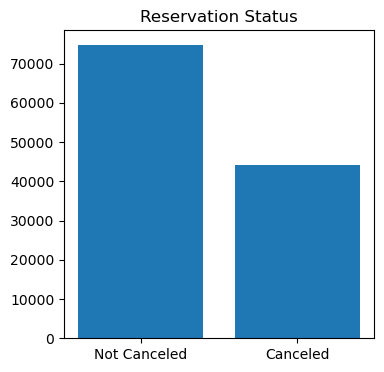

In [18]:
cancelled_per = hotel_data_copy['is_canceled'].value_counts(normalize=True)
print(cancelled_per)

plt.figure(figsize=(4,4))
plt.title('Reservation Status')
plt.bar(['Not Canceled','Canceled'],hotel_data_copy['is_canceled'].value_counts())
plt.show()

Inference:
1. We can see that the canceled resverstion are more than 50% of resvertion that were not canceled 

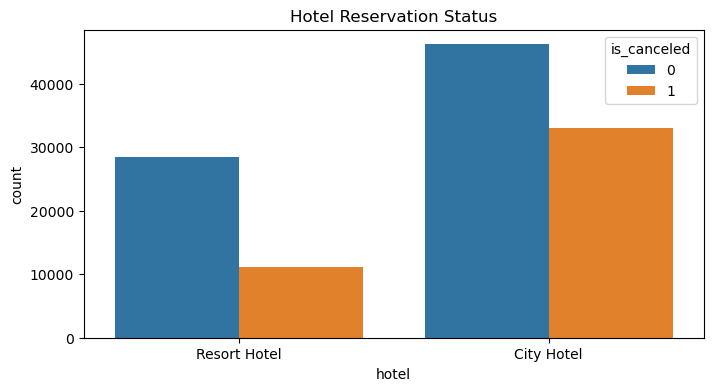

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(data = hotel_data_copy,x='hotel',hue='is_canceled')
plt.title('Hotel Reservation Status')
plt.show()

In [20]:
Resort_Hotel = hotel_data_copy[hotel_data_copy['hotel']=='Resort Hotel']
City_Hotel = hotel_data_copy[hotel_data_copy['hotel']=='City Hotel']

In [21]:
Resort_Hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [22]:
City_Hotel['is_canceled'].value_counts(normalize = True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

**Inference:**
1. Comparatively more number of cancelation have occured in City Hotel as compared to Resort hotel with respect to their reservations
2. In Resort Hotel almost 28% of cancelation have occurred
3. In City Hotel almost 42% of cancelation have occurred
4. Both do have a good number reservation that were not canceled 
5. But this percent of cancelation do effect the revenue of the hotel.

In [23]:
# Reservation staus in Resort and city hotel for every month

hotel_data_copy['month']= hotel_data_copy['reservation_status_date'].dt.month


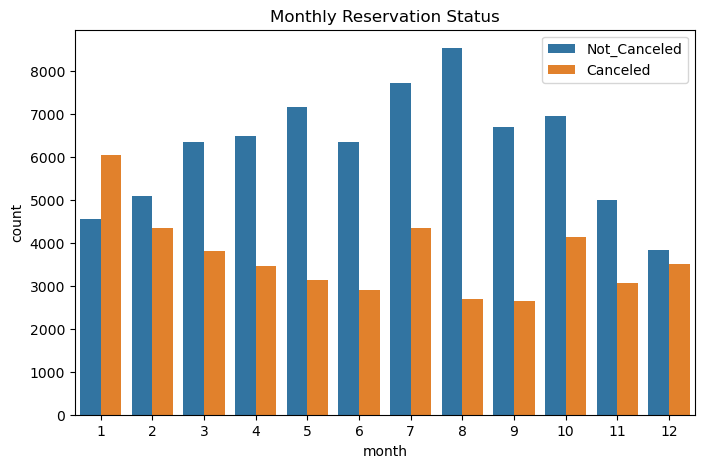

In [24]:
plt.figure(figsize=(8,5))
plt.title("Monthly Reservation Status")
sns.countplot(data= hotel_data_copy,x='month',hue='is_canceled')
plt.legend(['Not_Canceled','Canceled'])
plt.show()

<Axes: xlabel='month', ylabel='adr'>

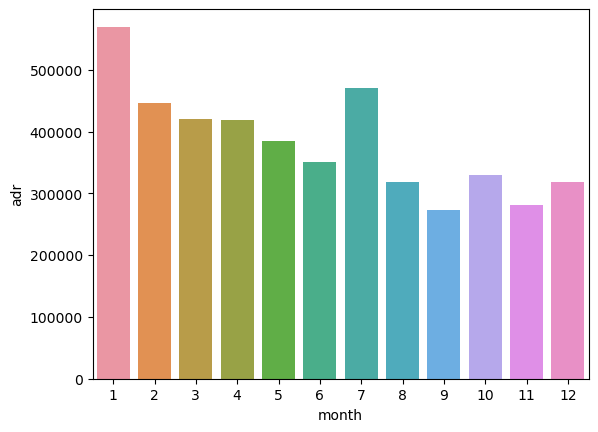

In [25]:
# Checking the price charged for each month

sns.barplot(x='month',y='adr',data=hotel_data_copy[hotel_data_copy['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())

**Inference:**
1. Month having more number cancelation have thier adr sum to be high and vice vera
2. It might be possible that as the charge price increases the possibility of cancelation also increases.

In [26]:
canceled_data = hotel_data_copy[hotel_data_copy['is_canceled']==1]
top10_country = canceled_data['country'].value_counts()[:10]


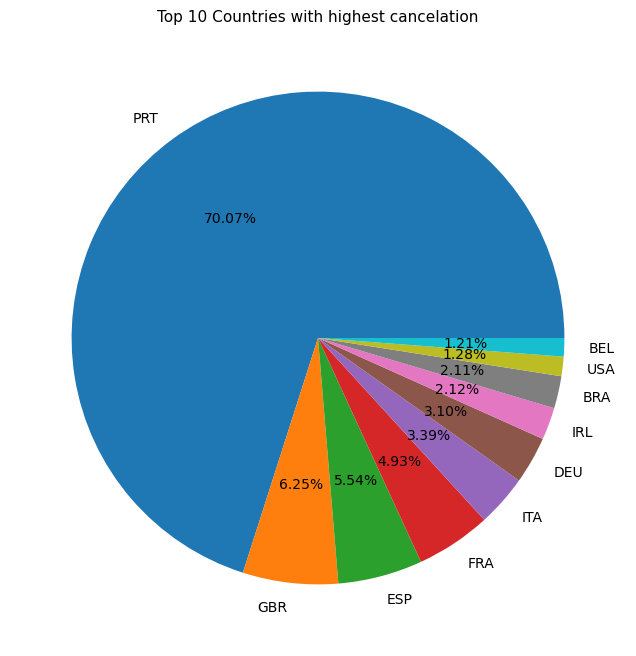

In [27]:

plt.figure(figsize=(8,8))
plt.title("Top 10 Countries with highest cancelation",size=11)
plt.pie(top10_country,autopct = '%.2f%%',labels=top10_country.index)
plt.show()

In [28]:
not_canceled_data = hotel_data_copy[hotel_data_copy['is_canceled']==0]
top10_country_RNC = not_canceled_data['country'].value_counts()[:10]

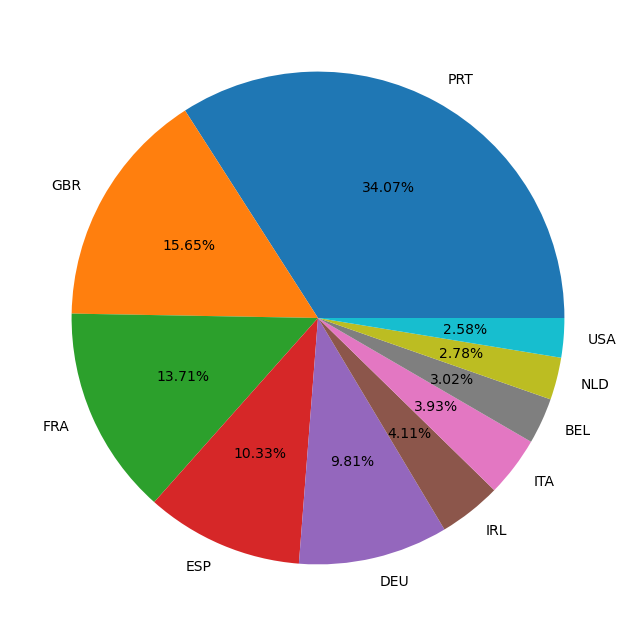

In [29]:
plt.figure(figsize=(8,8))
plt.pie(top10_country_RNC,autopct='%.2f%%',labels=top10_country_RNC.index)
plt.show()

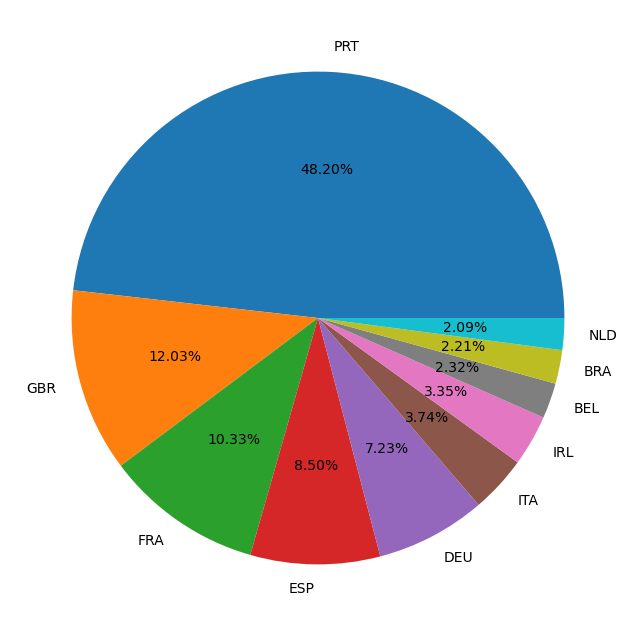

In [38]:
country_data = hotel_data_copy['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.pie(country_data,autopct='%.2f%%',labels=country_data.index)
plt.show()

**Inference**
1. Majority of the customers are from PRT country and also PRT country has the contiribution of most cancelation(70%).
2. This gives us the idea that this customers might need to be handled in some different way.

In [31]:
country_PRT = hotel_data_copy[hotel_data_copy['country']=='PRT']

In [35]:
country_PRT.groupby('customer_type')[['country']].count()

,country
customer_type,
Contract,1652
Group,250
Transient,35130
Transient-Party,11554


In [33]:
cancelation_custmer_type = country_PRT[country_PRT['is_canceled']==1].groupby('customer_type')[['country']].count()
cancelation_custmer_type

,country
customer_type,
Contract,1261
Group,57
Transient,20385
Transient-Party,5812


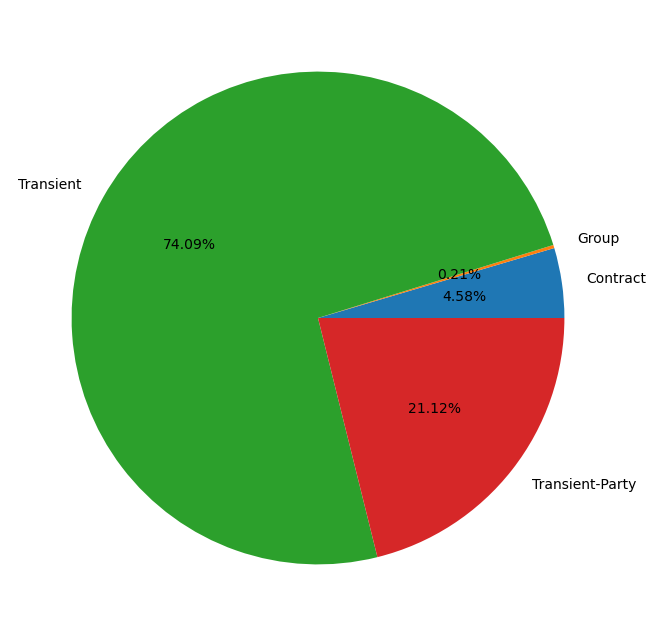

In [34]:
plt.figure(figsize=(8,8))
plt.pie(cancelation_custmer_type['country'],autopct='%.2f%%',labels=cancelation_custmer_type.index)
plt.show()

**Inference:**
1. Transient customers or we can say the customers who book their reservations for short time are having high cancelation possibility 

### Conclusion:

1. The rate of cancelation rises with the rise in average daily rate(adr).
2. Most of the reservation made from PRT country yet it is lability.
3. Because 70% of cancelations are from PRT country which do impacts the revenue of the hotels.